In [1]:
import astropy.table as astab
from isochrones import BinaryStarModel,get_ichrone
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from corner import corner
import arviz as az

Holoviews not imported. Some visualizations will not be available.


In [2]:
hq_joker_edr3_apogee_tess_df = astab.Table.read("/Users/kjaehnig/CCA_work/GAT/dr17_joker/unimodal_joker_sample_joined_w_tess_edr3_REDUX.fits").to_pandas()

In [3]:
def generate_params_for_multinest(ticnum):
    
    ticrow = hq_joker_edr3_apogee_tess_df.loc[hq_joker_edr3_apogee_tess_df['ID'] == ticnum]

    params = {
        'Teff':(ticrow.TEFF.squeeze(),ticrow.TEFF_ERR.squeeze()),
        'logg':(ticrow.LOGG.squeeze(),ticrow.LOGG_ERR.squeeze()),
        'feh':(ticrow.M_H.squeeze(), ticrow.M_H_ERR.squeeze()),
        'H':(ticrow.H.squeeze(), 0.02),
        'J':(ticrow.J.squeeze(),0.02),
        'K':(ticrow.K.squeeze(),0.02),
        'BP':(ticrow.phot_bp_mean_mag.squeeze(),0.002),
        'RP':(ticrow.phot_rp_mean_mag.squeeze(),0.002),
        'G':(ticrow.phot_g_mean_mag.squeeze(),0.001),
        'parallax':(ticrow.parallax.squeeze(), ticrow.parallax_error.squeeze())
    }
    
    return params


In [15]:
def initialize_multinest_binary_model(ticnum):
    
    params = generate_params_for_multinest(ticnum)
    
    mist = get_ichrone('mist', bands=['J','H','K','BP','RP','G'])
    
    binarymodel = BinaryStarModel(mist, **params, name=f'TIC_{ticnum}')
    
#     distance = 1000./params['parallax'][0]
    
    binarymodel.set_bounds(eep=(202,1400), age=(7,11.))
    
    return binarymodel

In [45]:
binmod = initialize_multinest_binary_model(272074664)

In [ ]:
binmod.fit(n_live_points=3000,overwrite=True)

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 3000
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.999672
Replacements:                               3050
Total Samples:                              3051
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -32551.501124 +/-  0.999836
Acceptance Rate:                        0.999678
Replacements:                               3100
Total Samples:                              3101
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -32551.517380 +/-  0.999839
Acceptance Rate:                        0.999365
Replacements:                               3150


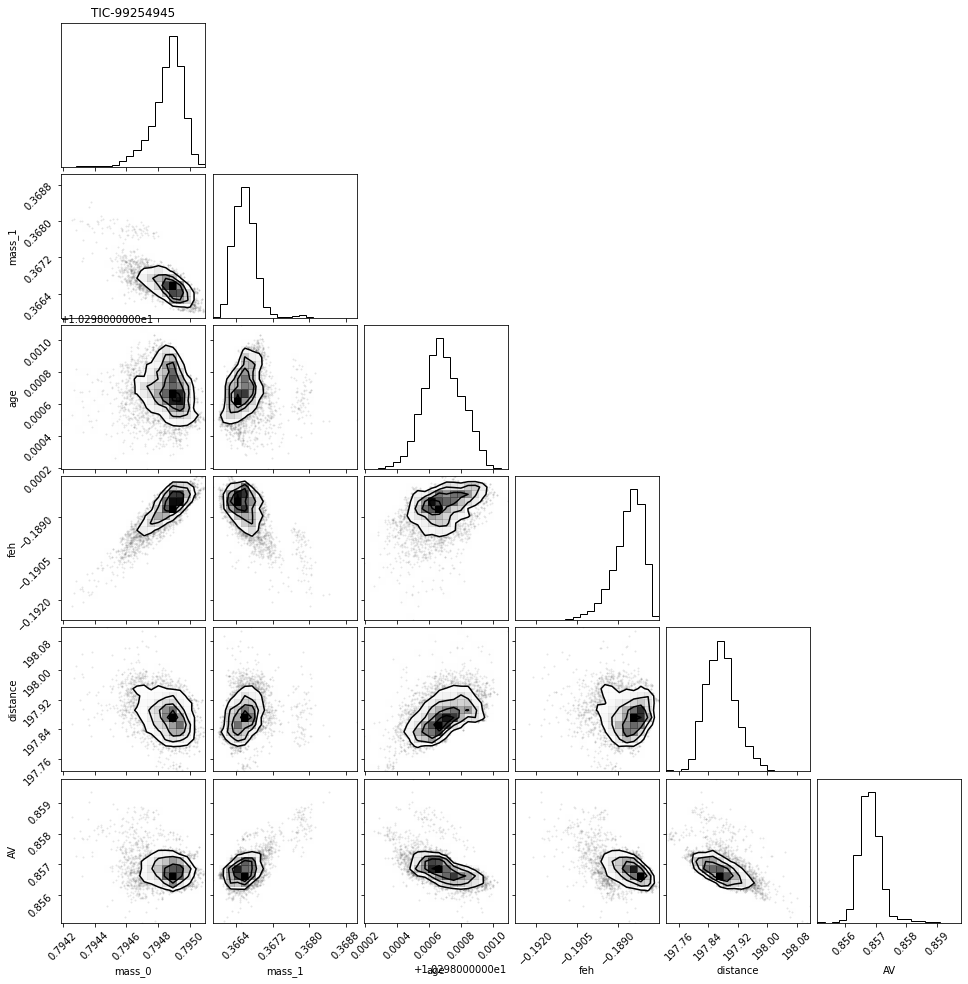

In [20]:
fig = corner(az.from_dict(binmod.derived_samples[['mass_0','mass_1','age','feh','distance','AV']].to_dict('list')))
fig.axes[0].set_title("TIC-99254945")
plt.savefig("testcorner.png",dpi=150,bbox_inches='tight')


In [19]:
binmod.derived_samples['age'].mean()

10.298685694034601

In [22]:
tic_systems_of_interest = [28159019,99254945,126232983,164458426,164527723,165453878,169820068,258108067,271548206,272074664,20215452,144441148,365204192]
file = open("/Users/kjaehnig/CCA_work/GAT/tic_systems_of_interest.txt",'w')
for ticnum in tic_systems_of_interest:
    file.write(f'TIC_{ticnum}\n')
file.close()

In [ ]:

for ticsystem in tic_systems_of_interest:
    binmod = initialize_multinest_binary_model(ticsystem)
    binmod.fit(n_live_points=2000, overwrite=True)
    fig = corner(az.from_dict(binmod.derived_samples[['mass_0','mass_1','age','feh','distance','AV']].to_dict('list')))
    fig.axes[0].set_title(f'TIC-{ticsystem}')
    plt.savefig(f"/Users/kjaehnig/CCA_work/GAT/figs/tic_{ticsystem}_multinest_corner.png",dpi=150,bbox_inches='tight')
    plt.close()
    binmod.save_hdf(f"/Users/kjaehnig/CCA_work/GAT/pymultinest_fits/tic_{ticsystem}_binary_model_obj.hdf",overwrite=True)

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 2000
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.999512
Replacements:                               2050
Total Samples:                              2051
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -24264.579568 +/-  0.999756
Acceptance Rate:                        0.996678
Replacements:                               2100
Total Samples:                              2107
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -24264.606505 +/-  0.999763
Acceptance Rate:                        0.994910
Replacements:                               2150


 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 2000
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.999512
Replacements:                               2050
Total Samples:                              2051
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):   -8872.674502 +/-  0.999756
Acceptance Rate:                        0.998099
Replacements:                               2100
Total Samples:                              2104
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):   -8872.700014 +/-  0.999762
Acceptance Rate:                        0.997680
Replacements:                               2150


In [32]:
tic4664mod = BinaryStarModel.load_hdf("/Users/kjaehnig/CCA_work/GAT/pymultinest_fits/tic_272074664_binary_model_obj.hdf")

In [42]:
m0,m1,r0, r1 = tic4664mod.derived_samples[['mass_0','mass_1','radius_0', 'radius_1']].median()

In [43]:
print(m0,m1,r0,r1)

1.2389799365124232 0.8555946687990773 1.6933470251007043 0.8039690401696074


Text(0.5, 1.0, 'TIC-272074664')

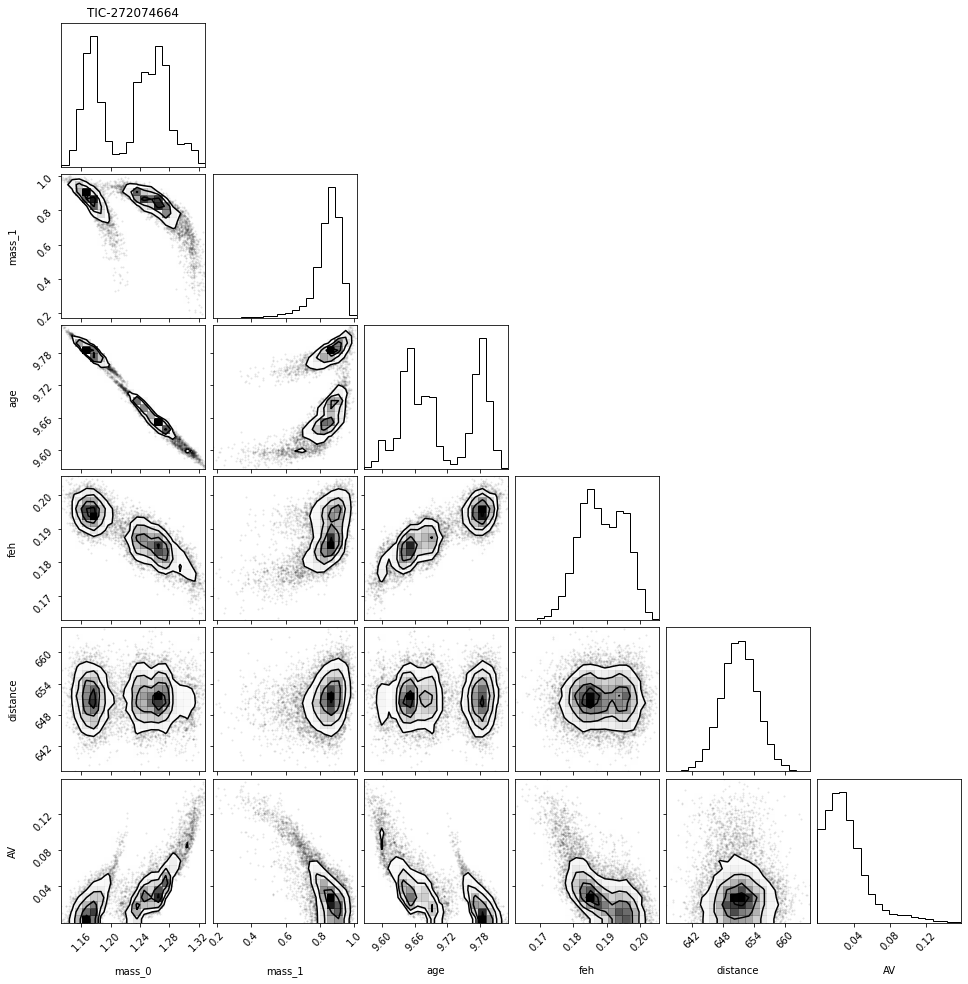

In [44]:
fig = corner(az.from_dict(tic4664mod.derived_samples[['mass_0','mass_1','age','feh','distance','AV']].to_dict('list')))
fig.axes[0].set_title("TIC-272074664")